### Statement

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!



To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!



### Dataset Description

In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

File and Data Field Descriptions

<u><b>train.csv</b></u> - Personal records for about two-thirds (aprox 8700) of the passengers, to be used as training data.

<u>PassengerId</u> - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

<u>HomePlanet</u> - The planet the passenger departed from, typically their planet of permanent residence.

<u>CryoSleep</u> - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

<u>Cabin</u> - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

<u>Destination</u> - The planet the passenger will be debarking to.

<u>Age</u> - The age of the passenger.

<u>VIP</u> - Whether the passenger has paid for special VIP service during the voyage.

<u>RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</u> - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

<u>Name</u> - The first and last names of the passenger.

<u>Transported</u> - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

<u><b>test.csv</b></u> - Personal records for the remaining one-third (aprox 4300) of the passengers, to be used as test data. 

### Your task is to predict the value of Transported for the passengers in this set.
<u>sample_submission.csv</u> - A submission file in the correct format.

<u>PassengerId</u> - Id for each passenger in the test set.

<u>Transported</u> - The target. For each passenger, predict either <b>True</b> or <b>False</b>.

In [187]:
#importing all required modules

import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [188]:
#load the data using pandas
space_data = pd.read_csv("/home/ubox96/ML/SpaceShip/train.csv")

In [189]:
# view first five rows of data
space_data.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [190]:
# view shape of the data
space_data.shape

(8693, 14)

In [191]:
#view some information about data
space_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [192]:
#view some information about data
space_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [193]:
#check if data has null values
space_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [194]:
#fill null values with respective columns mode/median
space_data["HomePlanet"].fillna(space_data["HomePlanet"].mode()[0], inplace=True)
space_data["CryoSleep"].fillna(space_data["CryoSleep"].mode()[0], inplace=True)
space_data["Cabin"].fillna(space_data["Cabin"].mode()[0], inplace=True)
space_data["Destination"].fillna(space_data["Destination"].mode()[0], inplace=True)
space_data["Age"].fillna(space_data["Age"].mean(), inplace=True)
space_data["VIP"].fillna(space_data["VIP"].mode()[0], inplace=True)
space_data["RoomService"].fillna(space_data["RoomService"].mean(), inplace=True)
space_data["FoodCourt"].fillna(space_data["FoodCourt"].mean(), inplace=True)
space_data["ShoppingMall"].fillna(space_data["ShoppingMall"].mean(), inplace=True)
space_data["Spa"].fillna(space_data["Spa"].mean(), inplace=True)
space_data["VRDeck"].fillna(space_data["VRDeck"].mean(), inplace=True)
# space_data["Name"].fillna(space_data["Name"]., inplace=True)
space_data.pop("Name")

0         Maham Ofracculy
1            Juanna Vines
2           Altark Susent
3            Solam Susent
4       Willy Santantines
              ...        
8688    Gravior Noxnuther
8689      Kurta Mondalley
8690         Fayey Connon
8691     Celeon Hontichre
8692     Propsh Hontichre
Name: Name, Length: 8693, dtype: object

In [195]:
#verify if fill all the null values
space_data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [196]:
#categories values of some columns
space_data['HomePlanet']= space_data['HomePlanet'].astype('category')
space_data['HomePlanet']= space_data['HomePlanet'].cat.codes
# Earth = 0
# Europa = 1
# Mars = 2
space_data['VIP']= space_data['VIP'].astype('category')
space_data['VIP']= space_data['VIP'].cat.codes
space_data['CryoSleep']= space_data['CryoSleep'].astype('category')
space_data['CryoSleep']= space_data['CryoSleep'].cat.codes
# False = 0
# True = 1
space_data["Destination"] = space_data["Destination"].astype('category')
space_data["Destination"] = space_data["Destination"].cat.codes
# '55 Cancri e' = 0, 'PSO J318.5-22' = 1, 'TRAPPIST-1e' = 2

In [197]:
#view data after dividing into category
space_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True


In [198]:
# combine RoomService, FoodCourt, VRDeck, ShoppingMall, Spa into one single column
space_data['total_billed'] = space_data['RoomService'] + space_data['FoodCourt'] + space_data['VRDeck'] + space_data['ShoppingMall'] + space_data['Spa']

In [199]:
# independent variable
x = space_data.drop(["PassengerId", "Cabin", "RoomService", "FoodCourt","ShoppingMall","Spa", "VRDeck", "Transported"], axis="columns")
x.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,total_billed
0,1,0,2,39.0,0,0.0
1,0,0,2,24.0,0,736.0
2,1,0,2,58.0,1,10383.0
3,1,0,2,33.0,0,5176.0
4,0,0,2,16.0,0,1091.0


In [200]:
new_df = space_data['Transported']
new_df.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [201]:
new_df = new_df.astype('category')
new_df = new_df.cat.codes
# dependent variable
y = new_df

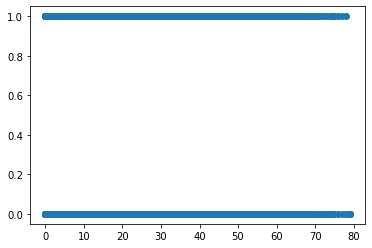

In [202]:
#plot scatter plot to view relation between dependent and independent variable
plt.scatter(x['Age'],y)

In [203]:
#define a model
model = LogisticRegression()

In [204]:
#train logistic regression model
model.fit(x,y)

LogisticRegression()

In [205]:
# load data for testing
test_data = pd.read_csv("/home/ubox96/ML/SpaceShip/test.csv")

In [206]:
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [207]:
#check if data has null values
test_data.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [208]:
#fill null values with respective columns mode/median

test_data["HomePlanet"].fillna(test_data["HomePlanet"].mode()[0], inplace=True)
test_data["CryoSleep"].fillna(test_data["CryoSleep"].mode()[0], inplace=True)
test_data["Cabin"].fillna(test_data["Cabin"].mode()[0], inplace=True)
test_data["Destination"].fillna(test_data["Destination"].mode()[0], inplace=True)
test_data["Age"].fillna(test_data["Age"].mean(), inplace=True)
test_data["VIP"].fillna(test_data["VIP"].mode()[0], inplace=True)
test_data["RoomService"].fillna(test_data["RoomService"].mean(), inplace=True)
test_data["FoodCourt"].fillna(test_data["FoodCourt"].mean(), inplace=True)
test_data["ShoppingMall"].fillna(test_data["ShoppingMall"].mean(), inplace=True)
test_data["Spa"].fillna(test_data["Spa"].mean(), inplace=True)
test_data["VRDeck"].fillna(test_data["VRDeck"].mean(), inplace=True)
# space_data["Name"].fillna(space_data["Name"]., inplace=True)
test_data.pop("Name")

0        Nelly Carsoning
1         Lerome Peckers
2        Sabih Unhearfus
3       Meratz Caltilter
4        Brence Harperez
              ...       
4272         Jeron Peter
4273       Matty Scheron
4274         Jayrin Pore
4275      Kitakan Conale
4276    Lilace Leonzaley
Name: Name, Length: 4277, dtype: object

In [209]:
#categories values of some columns

test_data['HomePlanet']= test_data['HomePlanet'].astype('category')
test_data['HomePlanet']= test_data['HomePlanet'].cat.codes
test_data['VIP']= test_data['VIP'].astype('category')
test_data['VIP']= test_data['VIP'].cat.codes
# Earth = 0
# Europa = 1
# Mars = 2
test_data['CryoSleep']= test_data['CryoSleep'].astype('category')
# False = 0
# True = 1
test_data['CryoSleep']= test_data['CryoSleep'].cat.codes
test_data["Destination"] = test_data["Destination"].astype('category')
test_data["Destination"] = test_data["Destination"].cat.codes

In [210]:
# view first five rows of test data 
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0013_01,0,1,G/3/S,2,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0018_01,0,0,F/4/S,2,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,0019_01,1,1,C/0/S,0,31.0,0,0.0,0.0,0.0,0.0,0.0
3,0021_01,1,0,C/1/S,2,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0023_01,0,0,F/5/S,2,20.0,0,10.0,0.0,635.0,0.0,0.0


In [211]:
# combine RoomService, FoodCourt, VRDeck, ShoppingMall, Spa into one single column of test_data

test_data['total_billed'] = test_data['RoomService'] + test_data['FoodCourt'] + test_data['VRDeck'] + test_data['ShoppingMall'] + test_data['Spa']

In [212]:
#define independent variable
x_test= test_data.drop(["PassengerId", "Cabin", "RoomService", "FoodCourt","ShoppingMall","Spa", "VRDeck"], axis="columns")

In [213]:
x_test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,total_billed
0,0,1,2,27.0,0,0.0
1,0,0,2,19.0,0,2832.0
2,1,1,0,31.0,0,0.0
3,1,0,2,38.0,0,7418.0
4,0,0,2,20.0,0,645.0


In [214]:
#make prediction
y_predicted = model.predict(x_test)

In [215]:
(y_predicted[ : 200])

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0], dtype=int8)

In [216]:
# make a dataframe of result with column name: 'passengerId', 'Transported'
submission = pd.DataFrame(test_data["PassengerId"], columns=["PassengerId"])
submission['Transported'] = y_predicted
submission['Transported'] = submission['Transported'].astype('bool') 
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


### Result

In [217]:
#Save the final result into a csv file
submission.to_csv("submission_2.csv")